# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
#finding the mean
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

sum = 0
count = 0

for num in sales:
  sum += num

for num in sales:
  if num > 1:
    count += 1

mean = sum / count

mean

3052.714285714286

In [0]:
#checking work
import numpy as np
sales_check = np.array(sales)
sales_check.mean()

3052.714285714286

In [0]:
#finding the variance

numerator = 0

for element in sales:
  numerator += (element - mean)**2

variance = numerator / (count - 1)

variance


214387.90476190473

In [0]:
#checking work
variance_check = sales_check.var(ddof=1)
variance_check

214387.90476190473

In [0]:
#std
sales_std = variance**(1/2)
sales_std

463.0204150595357

In [0]:
#checking work
np.sqrt(variance_check)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
#create dataframme
import pandas as pd
num_of_customers = [127,80,105,92,120,115,93]

combine = {"Sales": sales, "num_of_customers": num_of_customers}

df = pd.DataFrame(combine)

df.head(7)

,Sales,num_of_customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [0]:
#check covariance
df.cov()

,Sales,num_of_customers
Sales,214387.904762,7604.357143
num_of_customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
#find mean of number of customers
sum1 = 0
for num in num_of_customers:
  sum1 += num

mean1 = sum1 / count

In [0]:
#find variance of number of customers
numerator1 = 0

for element in num_of_customers:
  numerator1 += (element - mean1)**2

variance1 = numerator1 / (count - 1)

variance1

290.95238095238096

In [0]:
#find std of number of customers
customers_std = variance1**(1/2)
customers_std

17.057326313123664

In [0]:
#check work
np.sqrt(variance1)

17.057326313123664

In [0]:
sales_std

463.0204150595357

In [0]:
customers_std

17.057326313123664

In [0]:
#only get the correlation of Sales and num_of_customers
df['Sales'].cov(df['num_of_customers'])

7604.357142857142

In [0]:
 #using the correlation coefficient formula
 df['Sales'].cov(df['num_of_customers']) / (sales_std * customers_std)

0.9628339778148909

In [0]:
#check work
df.corr()

,Sales,num_of_customers
Sales,1.000000,0.962834
num_of_customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
#load titanic dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
#drop categorical columns
#I don't think this step was necessary because cov and corr does it automatically
titanic = titanic.drop(columns=['Unnamed: 0', 'name', 'sex', 'cabin', 'embarked', 'home.dest'])

In [0]:
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

(-1, 2)

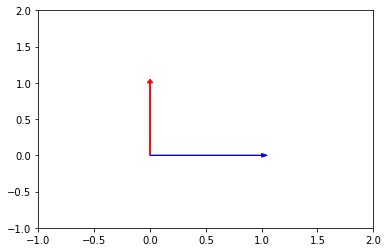

In [0]:
import matplotlib.pyplot as plt
  
vector1 = [0,1]
vector2 = [1,0]

plt.arrow(0,0, vector1[0], vector1[1], head_width=.05, head_length=.05, color='r')
plt.arrow(0,0, vector2[0], vector2[1], head_width=.05, head_length=.05, color='b')

plt.xlim(-1,2)
plt.ylim(-1,2)

orthogonal = perpendicular/90 degree angle/right angle

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [1]:
#dot product by hand
(-5 * 6) + (3 * -8) + (7 * 2)

-40

In [0]:
#These vectors are not orthogonal because the dot product does not equal 0
a = np.array([-5,3,7])
b = np.array([6,-8,2])

np.dot(a,b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2,-15,6,20])

In [0]:
#norm squared by hand
total = 0
for num in c:
  total += (num)**2


x = (total**(1/2))**2
x

665.0

In [0]:
check work
from numpy import linalg

linalg.norm(c)**2

665.0

In [0]:
#dot product by hand
(2*2) + (-15*-15) + (6*6) + (20 * 20)

665

In [0]:
#check work
np.dot(c,c)

665

In [0]:
np.dot(np.transpose(c), c)

665

They are all the same values, they are all multiplying to itself

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align} 

\begin{align}
d = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2 \begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{j}
\end{align} 



\begin{align}
||d|| = \sqrt{7^2 + 12^2} = \sqrt{49 + 144} = \sqrt{193} = \sqrt{193}
\end{align} 

\begin{align}
1 / \sqrt{193} = 0.07198157507
\end{align} 

\begin{align}
\hat{d} = \begin{bmatrix} .50 \\ .86 \end{bmatrix}
\end{align} 

\begin{align}
||e|| = \sqrt{2^2 + 11^2 + -8^2} = \sqrt{4 + 121 + 64} = \sqrt{189} = \sqrt{189}
\end{align} 

\begin{align}
1 / \sqrt{189} = 0.07273929674
\end{align} 

\begin{align}
\hat{e} = \begin{bmatrix} .15 \\ .80 \\ -.58 \end{bmatrix}
\end{align} 


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
#long (not using norm function)
f = np.array([4,12,11,9,2])
f_unit = []
total = 0
vec = 0
final = 0
vec1 = 0
for num in f:
  num = num**2
  total += num
  if num == 4:
    vec = np.sqrt(total)
    vec1 = 1 / vec
    for num1 in f:
      final = vec1 * num1
      f_unit.append(final)

f_unit

[0.20908334939572668,
 0.62725004818718,
 0.5749792108382483,
 0.470437536140385,
 0.10454167469786334]

In [0]:
#short (using norm function)
f = np.array([4,12,11,9,2])
f_unit = []
final = 0
for num in f:
  final = num / linalg.norm(f)
  f_unit.append(final) 
f_unit

[0.20908334939572668,
 0.62725004818718,
 0.5749792108382483,
 0.470437536140385,
 0.10454167469786334]

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

(-1.1, 2.5)

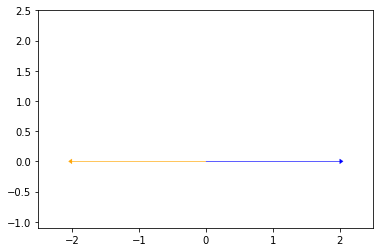

In [0]:
vector = [1,0]

vector_scale1 = np.multiply(2, vector)
vector_scale2 = np.multiply(-2, vector)

plt.arrow(0,0, vector_scale1[0], vector_scale1[1], linewidth=.3, head_width=.08, head_length = .05, color='blue')
plt.arrow(0,0, vector_scale2[0], vector_scale2[1], linewidth=.3, head_width=.08, head_length = .05, color='orange')

plt.xlim(-2.5,2.5)          
plt.ylim(-1.1,2.5)

(-1.1, 5)

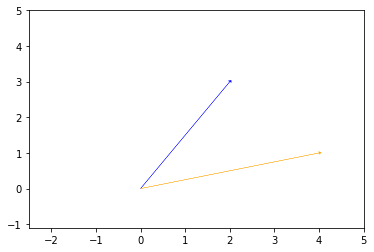

In [0]:
vector1 = [2, 3]
vector2 = [4, 1]

plt.arrow(0,0, vector1[0], vector1[1], linewidth=.3, head_width=.08, head_length = .05, color='blue')
plt.arrow(0,0, vector2[0], vector2[1], linewidth=.3, head_width=.08, head_length = .05, color='orange')

plt.xlim(-2.5,5)          
plt.ylim(-1.1,5)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

$\mathbb{R}^2$

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

$\mathbb{R}^3$

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



(-1.1, 5)

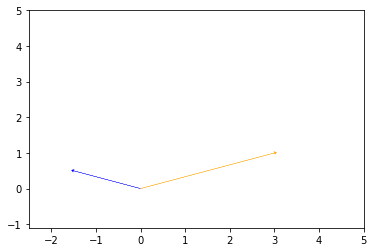

In [0]:
a = [-1.5, .5]
b = [3,1]

plt.arrow(0,0, a[0], a[1], linewidth=.3, head_width=.08, head_length = .05, color='blue')
plt.arrow(0,0, b[0], b[1], linewidth=.3, head_width=.08, head_length = .05, color='orange')

plt.xlim(-2.5,5)          
plt.ylim(-1.1,5)

## 6.2 What does it mean to form a basis?

A vector that spans the vector space $V$

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
P = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])

linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The dimension of the vector space spanned by its columns

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

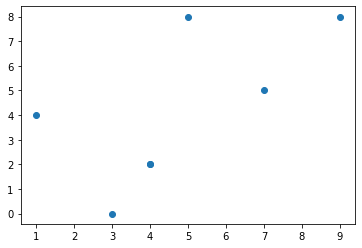

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()